In this project I will check whether there is some correlation between the "top 10" companies in the S&P500 index. The "top 10" tier is set arbitrarily for demonstration purposes and it does not represent any actual standing. The methodology shown below does not constitute trading advice. 

The companies selected are:
* Apple (AAPL)
* Microsoft (MSFT)
* Amazon (AMZN)
* Facebook (FB)
* Goocle (GOOGL)
* Alphabet Inc. (GOOG)
* Tesla (TSLE)
* JP Morgan (JPM)
* Johnson & Johnson (JNJ)

In this project I will:
1. Check whether there is any correlation between the closing values of the companies selected;
2. Try to build models that predict the stock values for each company based on historical data that exploits their correlation.
# Looking for correlations
## Uploading the data
The dataset I'll use here was generated with the Quandl API.

In [1]:
import pandas as pd

In [2]:
stocks = pd.read_hdf('top10sp500.h5', key='top10sp500')
stocks.head()

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,JPM,JNJ
Date,,,,,,,,,
2014-03-27,537.46,39.36,338.470,60.97,1114.28,558.46,207.32,59.92,97.28
2014-03-28,536.86,40.30,338.290,60.01,1120.15,559.99,212.37,60.04,97.44
2014-03-31,536.74,40.99,336.365,60.24,1114.51,556.97,208.45,60.71,98.23
2014-04-01,541.65,41.42,342.990,62.62,1134.89,567.16,216.97,60.67,97.94
2014-04-02,542.55,41.35,341.960,62.72,1135.10,567.00,230.29,60.48,98.23


In [3]:
stocks.tail()

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,JPM,JNJ
Date,,,,,,,,,
2018-03-21,171.270,92.48,1581.86,169.39,1094.00,1090.88,316.53,114.74,131.19
2018-03-22,168.845,89.79,1544.10,164.89,1053.15,1049.08,309.10,109.95,127.38
2018-03-23,164.940,87.18,1495.56,159.39,1026.55,1021.57,301.54,107.01,125.10
2018-03-26,172.770,93.78,1555.86,160.06,1054.09,1053.21,304.18,110.31,127.39
2018-03-27,168.340,89.47,1497.05,152.19,1006.94,1005.10,279.18,108.17,127.21


## Building a correlation table for each stock
First I set a step of *n* days forward in time.

In [4]:
n = 1

Then I check the correlations.
### Apple

In [7]:
future = stocks['AAPL'].values[n:]
apple = stocks[:-n].copy(deep=True)
apple.tail()

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,JPM,JNJ
Date,,,,,,,,,
2018-03-20,175.240,93.13,1586.51,168.15,1095.80,1097.71,310.55,114.64,131.21
2018-03-21,171.270,92.48,1581.86,169.39,1094.00,1090.88,316.53,114.74,131.19
2018-03-22,168.845,89.79,1544.10,164.89,1053.15,1049.08,309.10,109.95,127.38
2018-03-23,164.940,87.18,1495.56,159.39,1026.55,1021.57,301.54,107.01,125.10
2018-03-26,172.770,93.78,1555.86,160.06,1054.09,1053.21,304.18,110.31,127.39


In [8]:
apple['Target'] = future
apple.tail()

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,JPM,JNJ,Target
Date,,,,,,,,,,
2018-03-20,175.240,93.13,1586.51,168.15,1095.80,1097.71,310.55,114.64,131.21,171.270
2018-03-21,171.270,92.48,1581.86,169.39,1094.00,1090.88,316.53,114.74,131.19,168.845
2018-03-22,168.845,89.79,1544.10,164.89,1053.15,1049.08,309.10,109.95,127.38,164.940
2018-03-23,164.940,87.18,1495.56,159.39,1026.55,1021.57,301.54,107.01,125.10,172.770
2018-03-26,172.770,93.78,1555.86,160.06,1054.09,1053.21,304.18,110.31,127.39,168.340


In [9]:
apple_corr = apple.corr()
apple_corr['Target'].sort_values(ascending=False)

Target    1.000000
AAPL      0.984941
TSLA     -0.009541
JPM      -0.013037
GOOGL    -0.019099
JNJ      -0.037209
MSFT     -0.067522
GOOG     -0.069548
AMZN     -0.080608
FB       -0.142690
Name: Target, dtype: float64

In [10]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

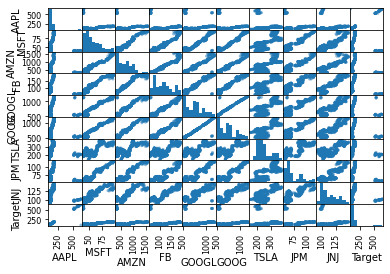

In [11]:
scatter_matrix(apple)
plt.show()

### Microsoft

In [12]:
future = stocks['MSFT'].values[n:]
msft = stocks[:-n].copy(deep=True)
msft['Target'] = future
msft_corr = msft.corr()
msft_corr['Target'].sort_values(ascending=False)

Target    1.000000
MSFT      0.998386
GOOG      0.968913
AMZN      0.962413
FB        0.957216
JPM       0.953728
GOOGL     0.937008
JNJ       0.906319
TSLA      0.750405
AAPL     -0.071438
Name: Target, dtype: float64

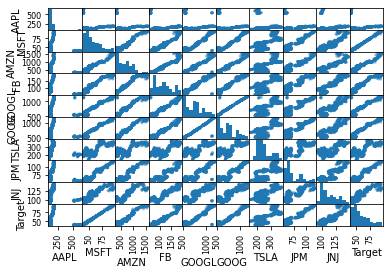

In [13]:
scatter_matrix(msft)
plt.show()

### Amazon

In [14]:
future = stocks['AMZN'].values[n:]
amzn = stocks[:-n].copy(deep=True)
amzn['Target'] = future
amzn_corr = amzn.corr()
amzn_corr['Target'].sort_values(ascending=False)

Target    1.000000
AMZN      0.999222
GOOG      0.973893
MSFT      0.962807
FB        0.961192
GOOGL     0.947438
JPM       0.916063
JNJ       0.868198
TSLA      0.682232
AAPL     -0.084812
Name: Target, dtype: float64

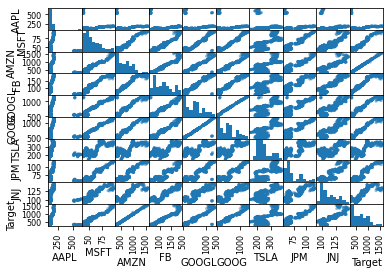

In [15]:
scatter_matrix(amzn)
plt.show()

### Facebook

In [16]:
future = stocks['FB'].values[n:]
fb = stocks[:-n].copy(deep=True)
fb['Target'] = future
fb_corr = fb.corr()
fb_corr['Target'].sort_values(ascending=False)

Target    1.000000
FB        0.998749
GOOG      0.971572
AMZN      0.959632
MSFT      0.955733
GOOGL     0.942230
JNJ       0.919753
JPM       0.900381
TSLA      0.731252
AAPL     -0.148613
Name: Target, dtype: float64

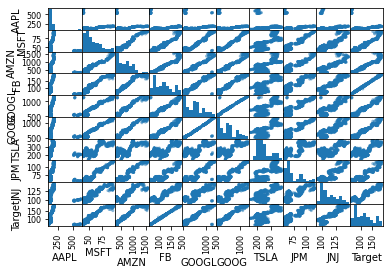

In [17]:
scatter_matrix(fb)
plt.show()

### Google

In [21]:
future = stocks['GOOGL'].values[n:]
google = stocks[:-n].copy(deep=True)
google['Target'] = future
google_corr = google.corr()
google_corr['Target'].sort_values(ascending=False)

Target    1.000000
GOOGL     0.993273
GOOG      0.978245
AMZN      0.951156
FB        0.948603
MSFT      0.940461
JPM       0.882408
JNJ       0.869839
TSLA      0.696735
AAPL     -0.035419
Name: Target, dtype: float64

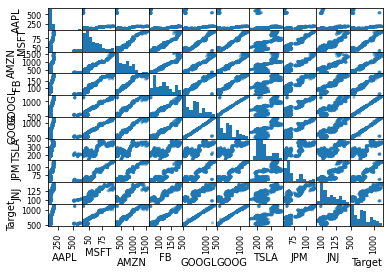

In [22]:
scatter_matrix(google)
plt.show()

### Alphabet Inc.

In [23]:
future = stocks['GOOG'].values[n:]
alpha = stocks[:-n].copy(deep=True)
alpha['Target'] = future
alpha_corr = alpha.corr()
alpha_corr['Target'].sort_values(ascending=False)

Target    1.000000
GOOG      0.998231
GOOGL     0.974226
AMZN      0.972899
FB        0.972319
MSFT      0.968076
JPM       0.905073
JNJ       0.896994
TSLA      0.716735
AAPL     -0.073347
Name: Target, dtype: float64

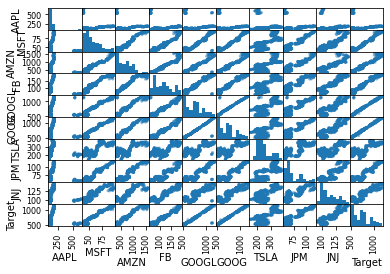

In [24]:
scatter_matrix(alpha)
plt.show()

### Tesla

In [25]:
future = stocks['TSLA'].values[n:]
tsla = stocks[:-n].copy(deep=True)
tsla['Target'] = future
tsla_corr = tsla.corr()
tsla_corr['Target'].sort_values(ascending=False)

Target    1.000000
TSLA      0.993099
JPM       0.781722
MSFT      0.749680
FB        0.730652
JNJ       0.728743
GOOG      0.716626
GOOGL     0.695514
AMZN      0.680418
AAPL     -0.012914
Name: Target, dtype: float64

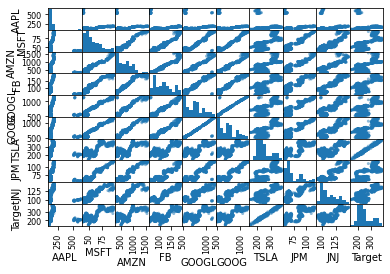

In [26]:
scatter_matrix(tsla)
plt.show()

### JP Morgan

In [27]:
future = stocks['JPM'].values[n:]
jpm = stocks[:-n].copy(deep=True)
jpm['Target'] = future
jpm_corr = jpm.corr()
jpm_corr['Target'].sort_values(ascending=False)

Target    1.000000
JPM       0.998432
MSFT      0.953972
AMZN      0.915118
GOOG      0.905292
FB        0.901716
GOOGL     0.879263
JNJ       0.854787
TSLA      0.782259
AAPL     -0.017813
Name: Target, dtype: float64

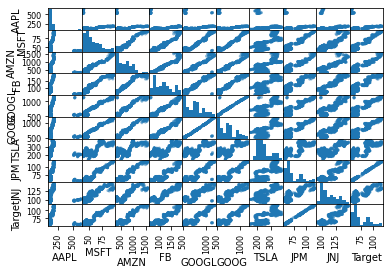

In [28]:
scatter_matrix(jpm)
plt.show()

### Johnson & Johnson

In [29]:
future = stocks['JNJ'].values[n:]
jnj = stocks[:-n].copy(deep=True)
jnj['Target'] = future
jnj_corr = jnj.corr()
jnj_corr['Target'].sort_values(ascending=False)

Target    1.000000
JNJ       0.997104
FB        0.919204
MSFT      0.904310
GOOG      0.896065
AMZN      0.866226
GOOGL     0.864633
JPM       0.851529
TSLA      0.728490
AAPL     -0.039120
Name: Target, dtype: float64

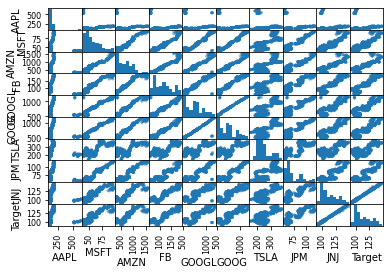

In [30]:
scatter_matrix(jnj)
plt.show()

## Conclusions
Almost all the stocks considered are highly correlated with each other and, by looking at the scatter matrices, it seems that the correlation is linear. I will verify whether linear regression is a good model for predicting these stock values in the next section.

# Building and testing a prediction model (linear regression)

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Microsoft

In [33]:
future = stocks['MSFT'].values[n:]
msft = stocks[:-n].copy(deep=True)
msft['Target'] = future
msft.head()

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,JPM,JNJ,Target
Date,,,,,,,,,,
2014-03-27,537.46,39.36,338.470,60.97,1114.28,558.46,207.32,59.92,97.28,40.30
2014-03-28,536.86,40.30,338.290,60.01,1120.15,559.99,212.37,60.04,97.44,40.99
2014-03-31,536.74,40.99,336.365,60.24,1114.51,556.97,208.45,60.71,98.23,41.42
2014-04-01,541.65,41.42,342.990,62.62,1134.89,567.16,216.97,60.67,97.94,41.35
2014-04-02,542.55,41.35,341.960,62.72,1135.10,567.00,230.29,60.48,98.23,41.01


In [34]:
X = msft[[
    'AAPL',
    'MSFT',
    'AMZN',
    'FB',
    'GOOGL',
    'GOOG',
    'TSLA',
    'JPM',
    'JNJ'
]]
y = msft['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln_msft = LinearRegression()
ln_msft.fit(X_train, y_train)

LinearRegression()

In [35]:
ln_msft.score(X_train, y_train)

0.9970898198145078

In [36]:
ln_msft.score(X_test, y_test)

0.9954444612370512

The linear model well fits both the training and the testing datasets. The data is neither underfit, nor overfit.

Let's check whther the predictions on the testing set are a good fit of the data also graphically.

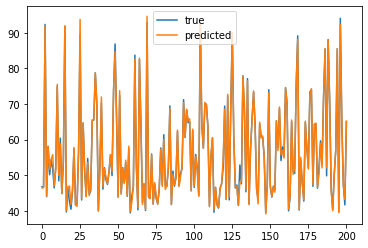

In [37]:
y_pred = ln_msft.predict(X_test)

plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

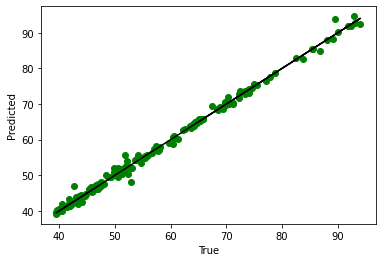

In [38]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

The linear regression model predicts the stock values of Microsoft with high accuracy. Now let's repeat the same process for all other stocks.

## Amazon

In [39]:
future = stocks['AMZN'].values[n:]
amzn = stocks[:-n].copy(deep=True)
amzn['Target'] = future

X = amzn[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = amzn['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln_amzn = LinearRegression()
ln_amzn.fit(X_train, y_train)

LinearRegression()

In [40]:
ln_amzn.score(X_train, y_train)

0.9984075197850492

In [41]:
ln_amzn.score(X_test, y_test)

0.9986255097068957

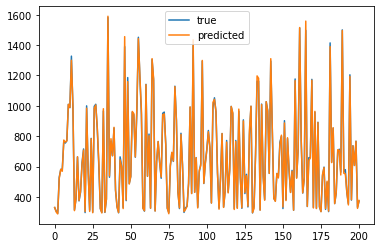

In [42]:
y_pred = ln_amzn.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

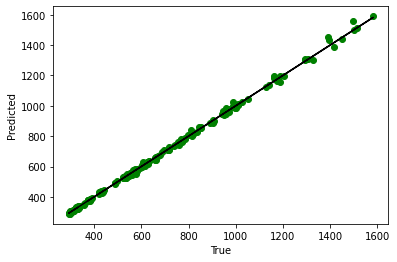

In [43]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## Facebook

In [44]:
future = stocks['FB'].values[n:]
fb = stocks[:-n].copy(deep=True)
fb['Target'] = future

X = fb[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = fb['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln_fb = LinearRegression()
ln_fb.fit(X_train, y_train)
ln_fb.score(X_train, y_train)

0.9975176508981393

In [45]:
ln_fb.score(X_test, y_test)

0.9975229127268118

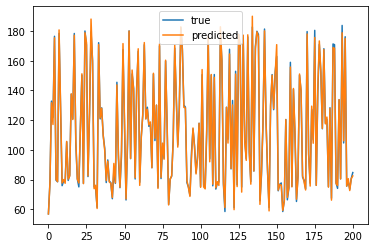

In [46]:
y_pred = ln_fb.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

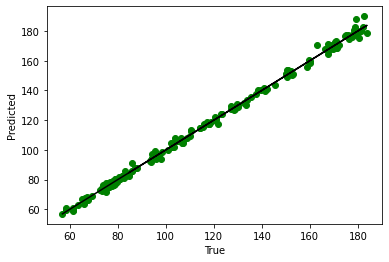

In [47]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## Google

In [48]:
future = stocks['GOOGL'].values[n:]
googl = stocks[:-n].copy(deep=True)
googl['Target'] = future

X = googl[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = googl['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln = LinearRegression()
ln.fit(X_train, y_train)
ln.score(X_train, y_train)

0.9870286078209736

In [49]:
ln.score(X_test, y_test)

0.9953030165292976

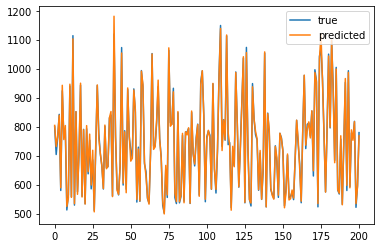

In [50]:
y_pred = ln.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

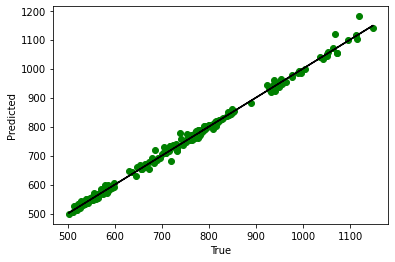

In [51]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## Alphabet Inc.

In [52]:
future = stocks['GOOG'].values[n:]
alpha = stocks[:-n].copy(deep=True)
alpha['Target'] = future

X = alpha[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = alpha['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln = LinearRegression()
ln.fit(X_train, y_train)
ln.score(X_train, y_train)

0.9964931886287252

In [53]:
ln.score(X_test, y_test)

0.9964986401291619

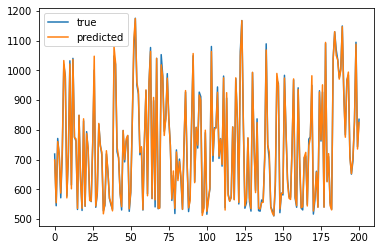

In [54]:
y_pred = ln.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

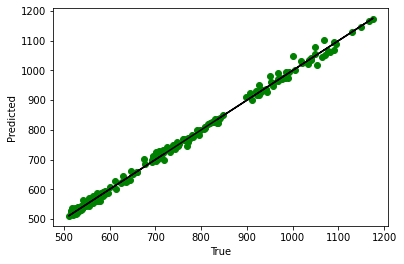

In [55]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## Tesla

In [56]:
future = stocks['TSLA'].values[n:]
tsla = stocks[:-n].copy(deep=True)
tsla['Target'] = future

X = tsla[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = tsla['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln = LinearRegression()
ln.fit(X_train, y_train)
ln.score(X_train, y_train)

0.9869188246528701

In [57]:
ln.score(X_test, y_test)

0.9836604949502765

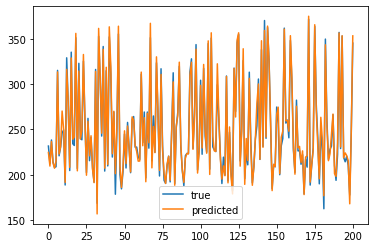

In [58]:
y_pred = ln.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

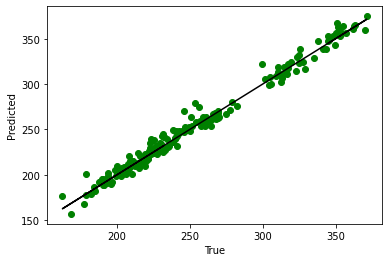

In [59]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## JP Morgan

In [60]:
future = stocks['JPM'].values[n:]
jpm = stocks[:-n].copy(deep=True)
jpm['Target'] = future

X = jpm[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = jpm['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln = LinearRegression()
ln.fit(X_train, y_train)
ln.score(X_train, y_train)

0.9968087548947604

In [61]:
ln.score(X_test, y_test)

0.9971721986453326

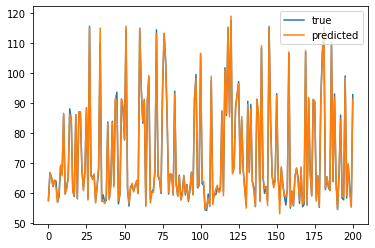

In [62]:
y_pred = ln.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

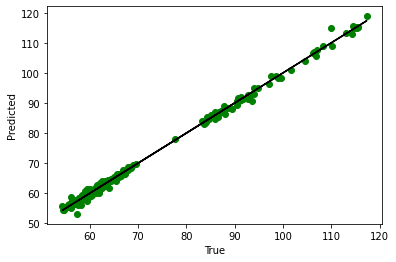

In [63]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## Johnson & Johnson

In [64]:
future = stocks['JNJ'].values[n:]
jnj = stocks[:-n].copy(deep=True)
jnj['Target'] = future

X = jnj[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = jnj['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln = LinearRegression()
ln.fit(X_train, y_train)
ln.score(X_train, y_train)

0.9940283828158639

In [65]:
ln.score(X_test, y_test)

0.9952977260336459

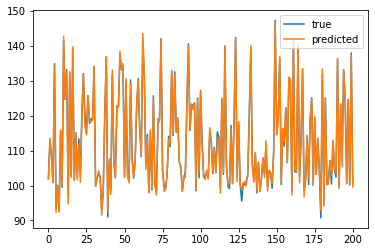

In [66]:
y_pred = ln.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

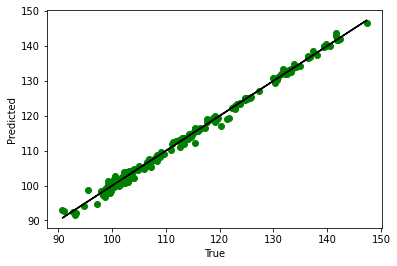

In [67]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## Apple

In [68]:
future = stocks['AAPL'].values[n:]
aapl = stocks[:-n].copy(deep=True)
aapl['Target'] = future

X = aapl[['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'TSLA', 'JPM', 'JNJ']]
y = aapl['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ln = LinearRegression()
ln.fit(X_train, y_train)
ln.score(X_train, y_train)

0.9600819740396979

In [69]:
ln.score(X_test, y_test)

0.9977217504622602

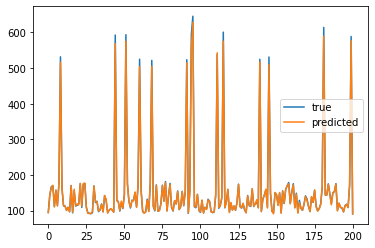

In [70]:
y_pred = ln.predict(X_test)
plt.plot(y_test.values, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

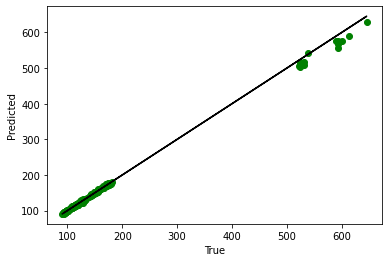

In [71]:
plt.scatter(y_test.values, y_pred, color='g')
plt.plot(y_test.values, y_test.values, color='k')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## Conclusions
The "Top 10" stocks of the S&P500 index are linearly correlated, as in all cases their close values were predicted with linear regression models with high accuracy.